# Programming for Data Analytics - Assignment 3 - pie

************************
*Task 03 of the assessment - pie chart of the email domains* 
************************

*Create a notebook called assignment03-pie.ipynb*

*The note book should have a nice pie chart of peoples email domains in the csv file at the url*

*https://drive.google.com/uc?id=1AWPf-pJodJKeHsARQK_RHiNsE8fjPCVK&export=download*

*This csv file has 1000 people. You may download the data or link to it.*

*Marks will be given for:*
- *Just creating the pie chart*
- *Making it look nice*

*****
I am importing nessesary libraries and reading the data. After inspecting the data, I needed to remove unessesary symbols from the string in my email columns. By using regular expression I find everything before and including the `@` symbol in `email` column and replace it with an empty string. So my result will be: from `carias@example.net` it will be `example.net`

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

# Directory containing the data files
DATADIR = './data_files/'
FILENAME = 'people-100.csv'
df = pd.read_csv(DATADIR+FILENAME)

# Function to extract domain from email by using regular expressions 
def extract_domain(email):
    return re.sub(r'^.*?@', '', email) # Replace everything up to and including the '@' symbol with an empty string

 # Add a new column 'domain' with extracted domains
df['domain'] = df['Email'].apply(extract_domain)

# Save the new DataFrame with only the domain to a new CSV file
df[['domain']].to_csv('domains.csv', index=False)

#printing to see how new data looks
print(df[['domain']])

         domain
0   example.net
1   example.com
2   example.com
3   example.com
4   example.net
..          ...
95  example.org
96  example.net
97  example.org
98  example.org
99  example.org

[100 rows x 1 columns]


Now, I will be creating a pie chart to see the percentage distribution of domains in my dataset. 

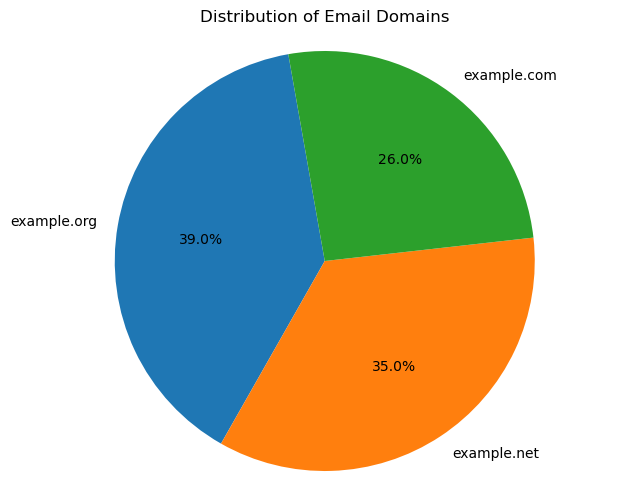

In [2]:

# Count occurrences of each domain
domain_counts = df['domain'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(domain_counts, labels=domain_counts.index, autopct='%1.1f%%', startangle=100) #autopct='%1.1f%%' displays the percentage on the pie slices.
plt.title('Distribution of Email Domains')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.savefig('email_domains.png')
plt.show()



***
End